In [1]:
# global var set
import transformers

# model info, change as needed
batch_size = 16
num_epochs = 16

model_checkpoint = 'distilbert-base-uncased-finetuned-sst-2-english'
# model_checkpoint = 'bert-base-uncased'
# fileTag = "original-plutchik-noCombin-v1"   # original - no Combine    - pure raw
# fileTag = "original-plutchik-v1"             # original - w/ Combine
# fileTag = "clean-noCombin-v1"                # clean    - no Combine
fileTag = "clean-v1"                         # clean    - w/ Combine    - pure clean

# Convert dataset to suitable format
IMPORTANT: please never run this section again if you have your dataset ready!

In [7]:
import pandas as pd
from pandas import DataFrame

trainDatasetOriginal = pd.read_csv(f'../../data/csv_version/dev/emotion/allcharlinepairs-{fileTag}.csv')
testDatasetOriginal = pd.read_csv(f'../../data/csv_version/test/emotion/allcharlinepairs-{fileTag}.csv')

In [8]:
trainDatasetProcessed = DataFrame({'emotion' : trainDatasetOriginal['emotion'],
                                   'plutchik' : trainDatasetOriginal['plutchik'],
                                  'selection0': pd.concat([trainDatasetOriginal['sentence'][:trainDatasetOriginal.shape[0]//3], trainDatasetOriginal.sample(frac = 1).reset_index()['sentence'][trainDatasetOriginal.shape[0]//3:]]), 
                                  'selection1': pd.concat([trainDatasetOriginal.sample(frac = 1).reset_index()['sentence'][:trainDatasetOriginal.shape[0]//3], 
                                                pd.concat([trainDatasetOriginal['sentence'][trainDatasetOriginal.shape[0]//3 : trainDatasetOriginal.shape[0]//3*2], 
                                                           trainDatasetOriginal.sample(frac = 1).reset_index()['sentence'][trainDatasetOriginal.shape[0]//3*2:]])]), 
                                  'selection2': pd.concat([trainDatasetOriginal.sample(frac = 1).reset_index()['sentence'][:trainDatasetOriginal.shape[0]//3*2], 
                                                           trainDatasetOriginal['sentence'][trainDatasetOriginal.shape[0]//3*2:]]),
                                  'label': pd.Series(0 if x < trainDatasetOriginal.shape[0]//3 else (1 if x < trainDatasetOriginal.shape[0]//3*2 else 2) for x in trainDatasetOriginal.index)}).sample(frac=1).reset_index(drop=True)

testDatasetProcessed = DataFrame({'emotion' : testDatasetOriginal['emotion'],
                                   'plutchik' : testDatasetOriginal['plutchik'],
                                  'selection0': pd.concat([testDatasetOriginal['sentence'][:testDatasetOriginal.shape[0]//3], testDatasetOriginal.sample(frac = 1).reset_index()['sentence'][testDatasetOriginal.shape[0]//3:]]), 
                                  'selection1': pd.concat([testDatasetOriginal.sample(frac = 1).reset_index()['sentence'][:testDatasetOriginal.shape[0]//3], 
                                                pd.concat([testDatasetOriginal['sentence'][testDatasetOriginal.shape[0]//3 : testDatasetOriginal.shape[0]//3*2], 
                                                testDatasetOriginal.sample(frac = 1).reset_index()['sentence'][testDatasetOriginal.shape[0]//3*2:]])]), 
                                  'selection2': pd.concat([testDatasetOriginal.sample(frac = 1).reset_index()['sentence'][:testDatasetOriginal.shape[0]//3*2], 
                                                           testDatasetOriginal['sentence'][testDatasetOriginal.shape[0]//3*2:]]),
                                  'label': pd.Series(0 if x < testDatasetOriginal.shape[0]//3 else (1 if x < testDatasetOriginal.shape[0]//3*2 else 2) for x in testDatasetOriginal.index)}).sample(frac=1).reset_index(drop=True)

In [9]:
trainDatasetProcessed.to_csv(f'./dataset/3Select-{fileTag}-train.csv')
trainDatasetProcessed

,emotion,plutchik,selection0,selection1,selection2,label
0,"['angry', 'impatient', 'none']","{'joy': 0, 'trust': 0, 'fear': 0, 'surprise': ...",Everyday after school we would all get togethe...,Jake was annoyed by it.,It was Remy's first day of college.,1
1,"['curious', 'content', 'secretative', 'fun', '...","{'joy': 2, 'trust': 0, 'fear': 0, 'surprise': ...",But security stopped him.,Kim was preparing to go to a gala that night.,Tom called him.,2
2,"['none', 'compassionate', 'kind', 'Relieved', ...","{'joy': 1, 'trust': 0, 'fear': 0, 'surprise': ...",He has a tv now but uses it only to watch dvds.,The clerk said yes and Missy was able to go.,Anna slid the eggs onto a plate.,1
3,"['none', 'annoyed', 'happy', 'failure', 'intri...","{'joy': 0, 'trust': 0, 'fear': 0, 'surprise': ...",She planted new ones.,One day a guy she liked said he played piano.,Kija has been researching methods of healthy e...,1
4,"['happy', 'unprepared', 'accomplished', 'none']","{'joy': 1, 'trust': 1, 'fear': 1, 'surprise': ...",The luggage requirement meant Dan had to pack ...,He went on to run for an hour around his neigh...,"While watching the news, they heard there was ...",0
...,...,...,...,...,...,...
12410,"['anxious', 'safe', 'relieved', 'none']","{'joy': 0, 'trust': 0, 'fear': 0, 'surprise': ...",Luckily she had her phone and she used the GPS...,It was brown and white.,Jenny never loved to study.,0
12411,"['gluttonous', 'remorse', 'guilty', 'stupid']","{'joy': 0, 'trust': 0, 'fear': 0, 'surprise': ...",Jason ate an entire carton of ice cream.,The beef upset her intestines.,Henry is at work.,0
12412,"['excited', 'none', 'Happy']","{'joy': 1, 'trust': 0, 'fear': 0, 'surprise': ...",My friend Zach decided to take us to a race tr...,We were staying at my Pop's house on vacation.,She was eating salsa while wearing a beautiful...,0
12413,"['none', 'nervous', 'anxious']","{'joy': 0, 'trust': 0, 'fear': 1, 'surprise': ...",He was scared of playing his first game.,But she did not let me because she wants me to...,Unfortunately it was past 11 AM.,0


In [10]:
testDatasetProcessed.to_csv(f'./dataset/3Select-{fileTag}-test.csv')
testDatasetProcessed

,emotion,plutchik,selection0,selection1,selection2,label
0,"['none', 'unhappy', 'responsible', 'confused']","{'joy': 0, 'trust': 0, 'fear': 1, 'surprise': ...",Her amateur record wasn't that good.,Cindy was being noisy in her apartment.,Unfortunately it worked too well for they neve...,2
1,"['none', 'determined', 'confident']","{'joy': 0, 'trust': 1, 'fear': 0, 'surprise': ...",Jessie didn't buy her mother a gift.,Lamie Mcramie knew it had to be done.,The woman hushed the man.,1
2,"['irritated', 'angry', 'sad', 'annoyed', 'impa...","{'joy': 0, 'trust': 0, 'fear': 0, 'surprise': ...",Candy had finally burned a ham.,Andy no longer has back problems after a few w...,She was on the highway and getting kind of irr...,2
3,"['Worried', 'hopeful', 'nervous', 'surprised',...","{'joy': 0, 'trust': 0, 'fear': 1, 'surprise': ...",She was nervous to ask for money.,He didn't think he was getting paid fairly.,He ended up signing up for tennis instead.,0
4,"['energetic', 'happy']","{'joy': 3, 'trust': 3, 'fear': 0, 'surprise': ...",Gary built a stronger chicken coop to keep the...,She would post pictures on social media whenev...,Rick stood in front of the oven watching the p...,1
...,...,...,...,...,...,...
11845,"['resentment', 'angry', 'content']","{'joy': 0, 'trust': 0, 'fear': 1, 'surprise': ...",I haven't gone back to Virginia Beach since.,Aubrey's grandmother had sent her a gift.,"After a few hours, snow began to fill my yard ...",0
11846,"['curious', 'none', 'surprised', 'embaressed',...","{'joy': 0, 'trust': 0, 'fear': 0, 'surprise': ...",His cat came inside and jumped into his lap.,I went near to her and ask where does she lives.,Emily was fascinated with the stamp on the let...,1
11847,"['curious', 'Curious', 'hungry']","{'joy': 0, 'trust': 0, 'fear': 0, 'surprise': ...",He got a shovel and started digging.,He wanted to have a taste.,We were very hot and not pleased with the serv...,1
11848,"['none', 'great and happy', 'talented', 'compe...","{'joy': 2, 'trust': 1, 'fear': 0, 'surprise': ...",Debbie was a devout vegetarian.,"She really, really, really had to go pee.",Tom was a professional golfer.,2


# load dataset

In [2]:
from datasets import load_dataset, load_metric

In [3]:
dataset = load_dataset('csv', data_files={'train': f'./dataset/3Select-{fileTag}-train.csv', 
                                           'test': f'./dataset/3Select-{fileTag}-test.csv'})

Using custom data configuration default-b2ace42b034a282c
Reusing dataset csv (C:\Users\JAM_0\.cache\huggingface\datasets\csv\default-b2ace42b034a282c\0.0.0\433e0ccc46f9880962cc2b12065189766fbb2bee57a221866138fb9203c83519)


  0%|          | 0/2 [00:00<?, ?it/s]

In [4]:
dataset

DatasetDict({
    train: Dataset({
        features: ['Unnamed: 0', 'emotion', 'plutchik', 'selection0', 'selection1', 'selection2', 'label'],
        num_rows: 11610
    })
    test: Dataset({
        features: ['Unnamed: 0', 'emotion', 'plutchik', 'selection0', 'selection1', 'selection2', 'label'],
        num_rows: 11129
    })
})

In [5]:
dataset['test'][0]

{'Unnamed: 0': 0,
 'emotion': "['proud', 'good', 'sad', 'angry', 'happy', 'excited']",
 'plutchik': "{'joy': 2, 'trust': 1, 'fear': 0, 'surprise': 1, 'sadness': 0, 'disgust': 0, 'anger': 0, 'anticipation': 1}",
 'selection0': 'The ball rocketed past the keep scoring his team a 1-0 lead.',
 'selection1': 'He quickly stopped in a local shoe store and looked around.',
 'selection2': 'Jay and Sarah met in a hotel once a week.',
 'label': 0}

In [6]:
def show_one(example):
    print(f"Context: {example['plutchik']}")
    print(f"  A - {example['selection0']}")
    print(f"  B - {example['selection1']}")
    print(f"  C - {example['selection2']}")
    print(f"\nGround truth: option {['A', 'B', 'C'][example['label']]}")

In [7]:
show_one(dataset["train"][0])

Context: {'joy': 2, 'trust': 1, 'fear': 0, 'surprise': 1, 'sadness': 0, 'disgust': 0, 'anger': 0, 'anticipation': 2}
  A - Tracy had a cousin that was looking for a car.
  B - Peter had to get rid of the dog.
  C - He painted his face and drank some beer.

Ground truth: option C


# Preprocessing Data

In [8]:
if model_checkpoint != 'distilbert-base-uncased-finetuned-sst-2-english':
    from transformers import AutoTokenizer
    tokenizer = AutoTokenizer.from_pretrained(model_checkpoint, use_fast=True)
else:
    from transformers import DistilBertTokenizer, DistilBertForMultipleChoice
    tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-cased")

In [11]:
import re
import ast
selectionList = ["selection0", "selection1", "selection2"]
weightRemap = ["NOT ", "LITTLE ", "", "VERY ", "ABSOLUTELY "]
def preprocess_function(examples):
    # Repeat each first sentence four times to go with the four possibilities of second sentences.
    # first_sentences = [["The following sentences contain emotions: {}".format(context.strip("[").strip("]").replace('\'', '')) ]*2 for context in examples["emotion"] ]
    # first_sentences = [["The following sentences contain emotions: {}".format(context.strip("[").strip("]").replace('\"', '')) ]*2 for context in examples["plutchik"] ]
    # first_sentences = [["The following sentences contain emotions: {}".format(", ".join([weightRemap[int(eachCaseWeight.replace("]", "").replace("[", "").replace("}", "").replace("{", "").replace("\"", "").replace("\'", ""))] 
    #                                                                   + eachCaseEmotionType.replace("]", "").replace("[", "").replace("}", "").replace("{", "").replace("\"", "").replace("\'", "").strip()
    #                     for eachCaseWeight, eachCaseEmotionType in 
    #                     zip([re.split(':|,',eachEmotionCombination)[1::2] for eachEmotionCombination in examples["plutchik"]][eventIndex], 
    #                        [re.split(':|,',eachEmotionCombination)[::2] for eachEmotionCombination in examples["plutchik"]][eventIndex])]))]*2 for eventIndex in 
    #                        range(len([re.split(':|,',eachEmotionCombination)[1::2] for eachEmotionCombination in examples["plutchik"]]))]
    
    first_sentences = [["The following sentences contain emotions: {}".format(', '.join([(weightRemap[eachEmotion[1]] + " " +eachEmotion[0]).strip() 
                       for eachEmotion in ast.literal_eval(context).items()]))]*3
                       for context in examples["plutchik"]]
    # first_sentences = [["The following sentences contain emotions: {}".format(context.strip("[").strip("]").replace('\"', '') 
    #                   if context in {"[]", "[\"none\"]"} 
    #                   else ', '.join([(weightRemap[eachEmotion[1]] + " " +eachEmotion[0]).strip() 
    #                                   for eachEmotion in ast.literal_eval(context.replace(":", "\" : ").replace("\",", ",").replace("[", "{").replace("\"]", "}").replace("]", "}")).items()]))]*2 
    #                    for context in examples["plutchik"]]
    # Grab all second sentences possible for each context.
    second_sentences = [[examples[selection][index] for selection in selectionList]for index in range(len(examples['selection0']))]

    # Flatten everything
    first_sentences = sum(first_sentences, [])
    second_sentences = sum(second_sentences, [])
    
    # Tokenize
    tokenized_examples = tokenizer(first_sentences, second_sentences, truncation=True)
    # Un-flatten
    # print(tokenized_examples.items())
    return {k: [v[i:i+3] for i in range(0, len(v), 3)] for k, v in tokenized_examples.items()}

In [12]:
examples = dataset["train"][:5]
features = preprocess_function(examples)
print(len(features["input_ids"]), len(features["input_ids"][0]), [len(x) for x in features["input_ids"][0]])

5 3 [51, 49, 49]


In [13]:
[tokenizer.decode(features["input_ids"][a][i]) for a in range(5) for i in range(3) ]

['[CLS] The following sentences contain emotions : joy, LITTLE trust, NOT fear, LITTLE surprise, NOT sadness, NOT disgust, NOT anger, anticipation [SEP] Tracy had a cousin that was looking for a car. [SEP]',
 '[CLS] The following sentences contain emotions : joy, LITTLE trust, NOT fear, LITTLE surprise, NOT sadness, NOT disgust, NOT anger, anticipation [SEP] Peter had to get rid of the dog. [SEP]',
 '[CLS] The following sentences contain emotions : joy, LITTLE trust, NOT fear, LITTLE surprise, NOT sadness, NOT disgust, NOT anger, anticipation [SEP] He painted his face and drank some beer. [SEP]',
 '[CLS] The following sentences contain emotions : VERY joy, LITTLE trust, NOT fear, LITTLE surprise, NOT sadness, NOT disgust, NOT anger, NOT anticipation [SEP] The owners bought her a soft dog bed. [SEP]',
 '[CLS] The following sentences contain emotions : VERY joy, LITTLE trust, NOT fear, LITTLE surprise, NOT sadness, NOT disgust, NOT anger, NOT anticipation [SEP] Just to put the picture on

In [14]:
encoded_datasets = dataset.map(preprocess_function, batched=True)

  0%|          | 0/12 [00:00<?, ?ba/s]

  0%|          | 0/12 [00:00<?, ?ba/s]

In [15]:
if model_checkpoint != 'distilbert-base-uncased-finetuned-sst-2-english':
    from transformers import AutoModelForMultipleChoice, TrainingArguments, Trainer
    model = AutoModelForMultipleChoice.from_pretrained(model_checkpoint)
else:
    from transformers import AutoModelForMultipleChoice, TrainingArguments, Trainer
    from transformers import DistilBertTokenizer, DistilBertForMultipleChoice
    import torch
    model = DistilBertForMultipleChoice.from_pretrained("distilbert-base-cased")

Some weights of the model checkpoint at distilbert-base-cased were not used when initializing DistilBertForMultipleChoice: ['vocab_projector.bias', 'vocab_layer_norm.bias', 'vocab_transform.bias', 'vocab_projector.weight', 'vocab_transform.weight', 'vocab_layer_norm.weight']
- This IS expected if you are initializing DistilBertForMultipleChoice from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForMultipleChoice from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForMultipleChoice were not initialized from the model checkpoint at distilbert-base-cased and are newly initialized: ['pre_classifier.weight', 'classifier.bias', 'pre_classifier.bias', 'classifier.weight']
You

In [16]:
model_name = model_checkpoint.split("/")[-1]
args = TrainingArguments(
    f"{model_name}-finetuned-emotionCommonsense",
    evaluation_strategy = "epoch",
    learning_rate=5e-6, # for bert-base
    # learning_rate=1e-3,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    num_train_epochs=num_epochs,
    weight_decay=0.01,
    push_to_hub=False,
)

In [17]:
from dataclasses import dataclass
from transformers.tokenization_utils_base import PreTrainedTokenizerBase, PaddingStrategy
from typing import Optional, Union
import torch

@dataclass
class DataCollatorForMultipleChoice:
    """
    Data collator that will dynamically pad the inputs for multiple choice received.
    """

    tokenizer: PreTrainedTokenizerBase
    padding: Union[bool, str, PaddingStrategy] = True
    max_length: Optional[int] = None
    pad_to_multiple_of: Optional[int] = None

    def __call__(self, features):
        label_name = "label" if "label" in features[0].keys() else "labels"
        labels = [feature.pop(label_name) for feature in features]
        batch_size = len(features)
        num_choices = len(features[0]["input_ids"])
        flattened_features = [[{k: v[i] for k, v in feature.items()} for i in range(num_choices)] for feature in features]
        flattened_features = sum(flattened_features, [])
        
        batch = self.tokenizer.pad(
            flattened_features,
            padding=self.padding,
            max_length=self.max_length,
            pad_to_multiple_of=self.pad_to_multiple_of,
            return_tensors="pt",
        )
        
        # Un-flatten
        batch = {k: v.view(batch_size, num_choices, -1) for k, v in batch.items()}
        # Add back labels
        batch["labels"] = torch.tensor(labels, dtype=torch.int64)
        return batch

In [18]:
accepted_keys = ["input_ids", "attention_mask", "label"]
features = [{k: v for k, v in encoded_datasets["train"][i].items() if k in accepted_keys} for i in range(10)]
batch = DataCollatorForMultipleChoice(tokenizer)(features)

In [19]:
[tokenizer.decode(batch["input_ids"][8][i].tolist()) for i in range(3)]

['[CLS] The following sentences contain emotions : LITTLE joy, trust, LITTLE fear, NOT surprise, LITTLE sadness, NOT disgust, NOT anger, LITTLE anticipation [SEP] After she ate she went home to nap. [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]',
 '[CLS] The following sentences contain emotions : LITTLE joy, trust, LITTLE fear, NOT surprise, LITTLE sadness, NOT disgust, NOT anger, LITTLE anticipation [SEP] Tim was furious. [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]',
 "[CLS] The following sentences contain emotions : LITTLE joy, trust, LITTLE fear, NOT surprise, LITTLE sadness, NOT disgust, NOT anger, LITTLE anticipation [SEP] She went to her best friend's birthday party. [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]"]

In [20]:
show_one(dataset["train"][8])

Context: {'joy': 1, 'trust': 2, 'fear': 1, 'surprise': 0, 'sadness': 1, 'disgust': 0, 'anger': 0, 'anticipation': 1}
  A - After she ate she went home to nap.
  B - Tim was furious.
  C - She went to her best friend's birthday party.

Ground truth: option C


# Trainer Defined

In [21]:
import numpy as np

valStored = []
def compute_metrics(eval_predictions):
    predictions, label_ids = eval_predictions
    preds = np.argmax(predictions, axis=1)
    valStored.append((preds != label_ids).astype(np.float32));
    return {"accuracy": (preds == label_ids).astype(np.float32).mean().item()}

In [22]:
trainer = Trainer(
    model,
    args,
    train_dataset=encoded_datasets["train"],
    eval_dataset=encoded_datasets["test"],
    tokenizer=tokenizer,
    data_collator=DataCollatorForMultipleChoice(tokenizer),
    compute_metrics=compute_metrics,
)

In [23]:
trainer.train()

The following columns in the training set don't have a corresponding argument in `DistilBertForMultipleChoice.forward` and have been ignored: emotion, plutchik, selection2, Unnamed: 0, selection0, selection1. If emotion, plutchik, selection2, Unnamed: 0, selection0, selection1 are not expected by `DistilBertForMultipleChoice.forward`,  you can safely ignore this message.
C:\Python\miniconda3\envs\pytorchEnvWithDataSci\lib\site-packages\transformers\optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
***** Running training *****
  Num examples = 11610
  Num Epochs = 16
  Instantaneous batch size per device = 16
  Total train batch size (w. parallel, distributed & accumulation) = 16
  Gradient Accumulation steps = 1
  Total optimization steps = 11616


Epoch,Training Loss,Validation Loss,Accuracy
1,1.099600,1.098160,0.362836
2,1.099000,1.022216,0.465540
3,0.966600,0.903368,0.534370
4,0.909900,0.870490,0.553868
5,0.853900,0.876004,0.563663
6,0.821200,0.893443,0.566807
7,0.783800,0.875368,0.567976
8,0.762200,0.899239,0.574535
9,0.731300,0.916781,0.575164
10,0.708400,0.918930,0.570042


Saving model checkpoint to distilbert-base-uncased-finetuned-sst-2-english-finetuned-emotionCommonsense\checkpoint-500
Configuration saved in distilbert-base-uncased-finetuned-sst-2-english-finetuned-emotionCommonsense\checkpoint-500\config.json
Model weights saved in distilbert-base-uncased-finetuned-sst-2-english-finetuned-emotionCommonsense\checkpoint-500\pytorch_model.bin
tokenizer config file saved in distilbert-base-uncased-finetuned-sst-2-english-finetuned-emotionCommonsense\checkpoint-500\tokenizer_config.json
Special tokens file saved in distilbert-base-uncased-finetuned-sst-2-english-finetuned-emotionCommonsense\checkpoint-500\special_tokens_map.json
The following columns in the evaluation set don't have a corresponding argument in `DistilBertForMultipleChoice.forward` and have been ignored: emotion, plutchik, selection2, Unnamed: 0, selection0, selection1. If emotion, plutchik, selection2, Unnamed: 0, selection0, selection1 are not expected by `DistilBertForMultipleChoice.fo

TrainOutput(global_step=11616, training_loss=0.7855961920472873, metrics={'train_runtime': 1267.0635, 'train_samples_per_second': 146.607, 'train_steps_per_second': 9.168, 'total_flos': 9156017459368728.0, 'train_loss': 0.7855961920472873, 'epoch': 16.0})

出现validation loss 上升情况大多是训练集验证集数据分布不一致，或者训练集过小，未包含验证集中所有情况，
也就是过拟合导致的。而解决这种现象可以尝试以下几种策略：
1. 增加训练样本增加正则项系数权重，
2. 减小过拟合加入早停机制，ValLoss上升几个epoch直接停止
3. 采用Focal Loss
4. 加入Label Smoothing

# Store Value

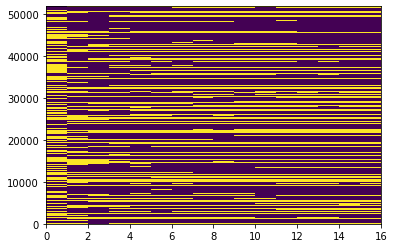

In [22]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

Z = np.transpose(valStored)

fig, ax = plt.subplots()
ax.pcolormesh(Z)

In [24]:
import pandas as pd

dataLog = pd.DataFrame(trainer.state.log_history)
dataLog.to_csv(f'./trainingMetric/[Plutchik] 3Select/TI-{model_checkpoint}-{fileTag}.csv')

In [25]:
evaluationIterationResult = pd.DataFrame(np.transpose(valStored))
evaluationIterationResult.to_csv(f'./trainingMetric/[Plutchik] 3Select/ESI-{model_checkpoint}-{fileTag}.csv')